In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
%matplotlib inline

In [2]:
# Default values of parameters for the dynamics of the resident strain
b_1 = 0.3  # Transmission rate of the resident strain
r = 0.012  # birth rate
s_S = 1  # vulnerability to infection
s_I = 2  # vulnerability to a new infection
k = 1  # beta_11 = beta_1*2 Or beta_11=beta_1

# Default values of recovery rate
g_1 = 0.04
g_11 = 0.03

# Parameters of the trade-off function
be = 0.4  # Singular strategy
al_be = 0.02  # alpha(beta*)
dal_be = 0.025  # alpha'(beta*)
ddal_be = 0.03  # alpha''(beta*)

In [3]:
# The trade-off function
def alpha(x):
    al = al_be - (((dal_be) ** 2) / ddal_be) * (1 - np.exp((ddal_be * (x - be)) / dal_be))
    return al

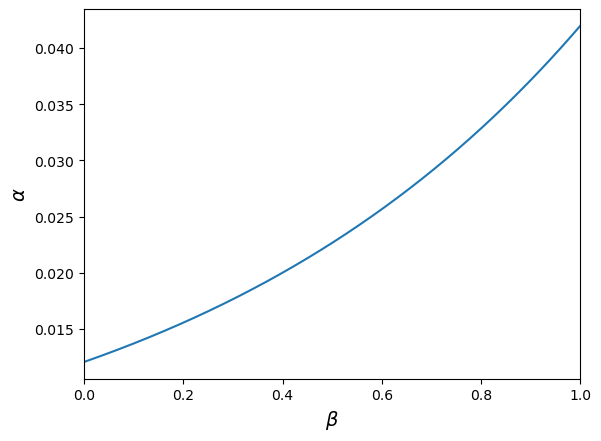

In [4]:
# Produce the plot of the trade-off function
betas = np.linspace(0, 1, 500)
alphas = alpha(betas)
plt.plot(betas, alphas)
plt.xlabel('$\\beta$', fontsize=14)
plt.ylabel('$\\alpha$', fontsize=14)
plt.xlim((0, 1))
plt.show()

In [5]:
# Dynamics of the resident strain
def dy_resident_with_recovery(x, t,
                              beta_1 = b_1,
                              rho = r,
                              sigma_S = s_S,
                              sigma_I = s_I,
                              beta_11beta_1 = k, 
                              gamma_1 = g_1, 
                              gamma_11 = g_11):
    
    mu = rho
    beta_11 = beta_11beta_1 * beta_1
    alpha_1 = alpha(beta_1)
    alpha_11 = alpha(beta_11)
    lambda_1 = beta_1 * x[1] + beta_11 * x[2]
    dSdt = rho + gamma_1 * x[1] + gamma_11 * x[2] - mu * x[0] - sigma_S * lambda_1 * x[0]
    dIdt = sigma_S * lambda_1 * x[0] - (mu + alpha_1 + sigma_I * lambda_1 + gamma_1) * x[1]
    dDdt = sigma_I * lambda_1 * x[1] - (mu + alpha_11 + gamma_11) * x[2]
    return dSdt, dIdt, dDdt

In [6]:
# Solve the population dynamics and produce the plot of resident's population dynamics
def plot_dynamics_with_recovery(beta_1 = b_1,
                                rho = r,
                                sigma_S = s_S,
                                sigma_I = s_I,
                                beta_11beta_1 = k,  
                                gamma_1 = g_1, 
                                gamma_11 = g_11): 
    
    # Time points
    tmax = 2000
    ts = np.linspace(0, 200, tmax)
    
    # Initial conditions x0 = [S0, I0, D0]
    x0 = [0.4, 0.1, 0.05]
    
    # Solve the population dynamics
    xs = odeint(dy_resident_with_recovery, x0, ts, args = (beta_1, rho, sigma_S, sigma_I, beta_11beta_1, gamma_1, gamma_11))
    Ss = xs[:, 0]
    Is = xs[:, 1]
    Ds = xs[:, 2]
    
    # Find the equilibrium
    S = Ss[tmax - 1]
    I = Is[tmax - 1]
    D = Ds[tmax - 1]
    print("These are the equilibrium points:", "S =", S, "I =", I, "D =", D)
    
    plt.plot(ts, Ss)
    plt.plot(ts, Is)
    plt.plot(ts, Ds)
    plt.xlabel('Time', fontsize=14)
    plt.ylabel('Densities', fontsize=14)
    plt.xlim((0, 200))
    plt.ylim((0))
    plt.legend(['$S$', '$I_1$', '$D_{11}$'], loc='center right')
    
    plt.show()
#    return S, I, D, I_m, D_1m

These are the equilibrium points: S = 0.20666098184265633 I = 0.07589897879911563 D = 0.2452892505279834


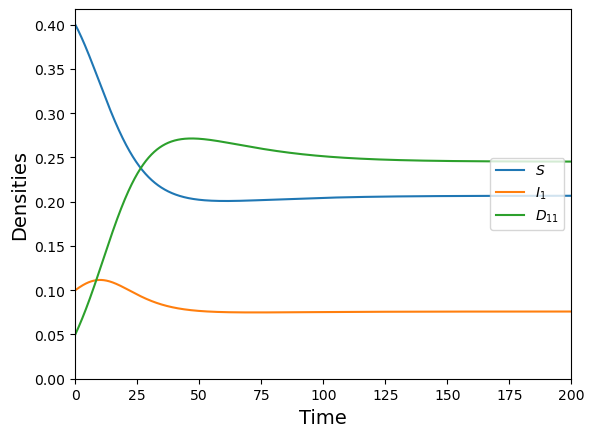

In [7]:
plot_dynamics_with_recovery()

These are the equilibrium points: S = 0.9553015731388611 I = 2.8107051617359776e-06 D = 1.0776187446820732e-06


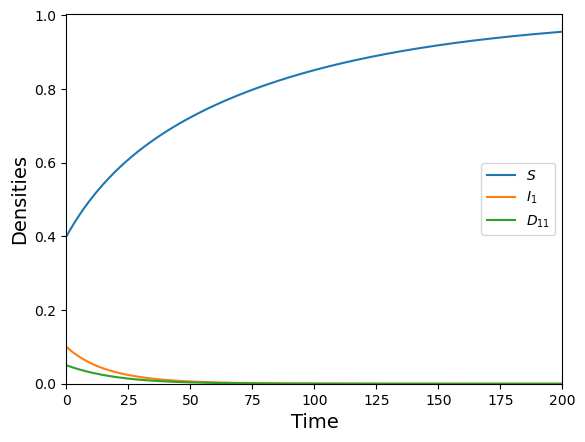

These are the equilibrium points: S = 0.9999993322490828 I = 6.219270686570332e-07 D = 5.011569300299213e-10


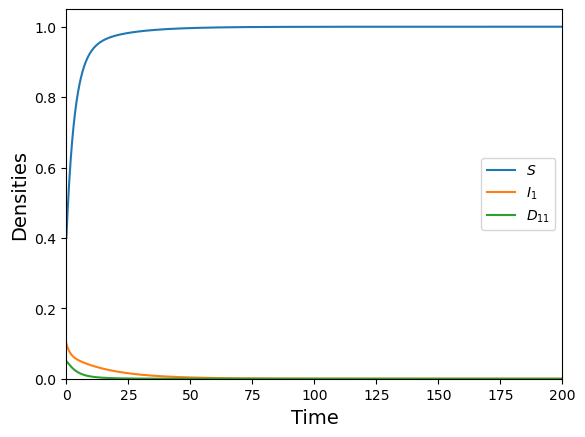

These are the equilibrium points: S = 0.9544252241785025 I = 3.987982154135741e-08 D = 7.85450416479638e-07


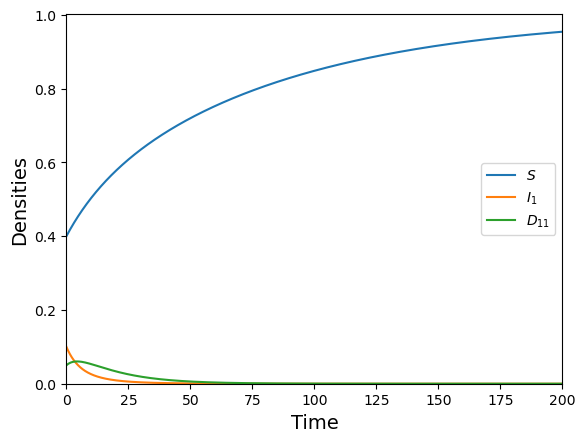

These are the equilibrium points: S = 0.2320707470935783 I = 0.3104113539806043 D = 0.00048611671867675974


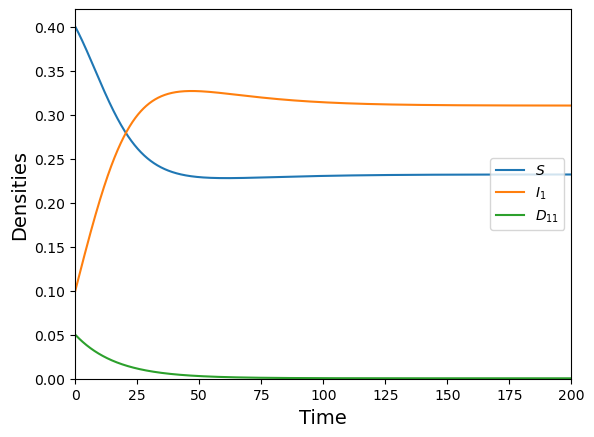

In [8]:
plot_dynamics_with_recovery(beta_1 = 0.01)
plot_dynamics_with_recovery(rho = 0.3)
plot_dynamics_with_recovery(sigma_S=0.001)
plot_dynamics_with_recovery(sigma_I = 0.001)